<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

# Visualización de datos con gráficos simples

En esta notebook recorremos distintos tipos básicos de grafícos que pueden utilizarse en el análisis de datos, con aplicaciones prácticas. Nos centraremos no sólo el código para generarlos, sino también en algunos pequeños trucos para lograr gráficos más legibles.

Es importante recordar que, a pesar de que esta notebook utiliza los datos para ejemplificar los gráficos, en la aplicación real de la ciencia de datos ocurre lo contrario. Debemos pensar primero en la pregunta a responder, y luego diseñar la visualización. Esto incluye:

1. Encontrar el gráfico adecuado para los datos
2. Agrupar los datos de manera que resalten el patrón que ayuda a responder la pregunta inicial.
3. Encontrar los encodings visuales más efectivos para comunicar este patrón (aunque no vamos a hablar tanto de eso en esta notebook).

Para nuestros ejemplos usaremos el conjunto de datos que generamos en clase. Pueden encontrar el link en las filminas.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
print(seaborn.__version__)

seaborn.set_style("darkgrid")

0.11.1


In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [4]:
# Con esto hacemos los gráficos más grandes, adecuados para las presentaciones.
seaborn.set_context(context='talk', font_scale=1)

In [5]:
## TODO: Cambiar la dirección del conjunto de datos de acuerdo a dónde lo guardaron
dataset = pandas.read_csv('../data/dataset-ayvd2020.csv')

In [6]:
dataset.columns = ['timestamp', 'gender', 'age', 'zodiac_sign', 'profession', 
                   'junior_programmer_salary', 'senior_programmer_salary']

In [7]:
dataset.columns

Index(['timestamp', 'gender', 'age', 'zodiac_sign', 'profession',
       'junior_programmer_salary', 'senior_programmer_salary'],
      dtype='object')

## 1. Tablas

Las tablas son muchas veces dejadas de lado en las visualizaciones, pero son una de las formas de representación más poderosa. Usualmente partimos de una tabla para generar visualizaciones más complejas, pero esto no significa que generar buenas tablas no sea útil en el proceso de comunicación.

* Muestran cantidades exactas
* Representan cualquier tipo de datos
* Son de acceso universal
* Son fáciles de crear
* Permiten comprar muchas variables

Lo primero que tenemos que hacer para comenzar a enteder el dataset es ver los valores como una tabla, para indentificar la información en cada una de las columnas.

In [8]:
dataset[:10]

,timestamp,gender,age,zodiac_sign,profession,junior_programmer_salary,senior_programmer_salary
0,31/03/2020 17:10:01,Mujer,27,Tauro,Programadora,40000.0,80000.0
1,12/05/2020 15:19:14,Mujer,40,Acuario,Docente investigadora,50000.0,90000.0
2,13/05/2020 13:43:48,Hombre,22,Géminis,Estudiante de Astronomía,25000.0,60000.0
3,13/05/2020 18:12:04,Mujer,23,Cáncer,profesora,32000.0,50000.0
4,14/05/2020 16:30:09,Hombre,33,Capricornio,Docente investigador,60000.0,80000.0
5,14/05/2020 19:46:32,Hombre,29,Sagitario,Ingenieria de circuitos integrados,55000.0,75000.0
6,14/05/2020 19:46:57,Hombre,36,Libra,Emprendedor,50000.0,80000.0
7,14/05/2020 19:49:24,Hombre,28,Cáncer,Diseñador de circuitos digitales,50000.0,60000.0
8,14/05/2020 19:53:12,Hombre,39,Escorpio,programador,100000.0,150000.0
9,14/05/2020 19:54:35,Hombre,28,Géminis,Estudiante de Sociología,40000.0,60000.0


También pandas nos permite otras operaciones simples de estadística descriptiva. En la siguiente línea, estamos filtrando las filas que se identifican como *Hombres* y describiendo la distribución de la columna *¿Qué tan conforme estás con tu sueldo?*

In [9]:
# Descripción de la distribución de la variable "¿Qué tan conforme estás con tu sueldo?"
# solo en los registros donde "Me identifico" tiene el valor Hombre
dataset[dataset.gender == 'Hombre'].junior_programmer_salary.describe()

count        99.000000
mean      51333.989899
std       15753.629594
min          65.000000
25%       40000.000000
50%       50000.000000
75%       60000.000000
max      130000.000000
Name: junior_programmer_salary, dtype: float64

## 2. Gráficos de barra

Comparan **cantidades numéricas** entre **variables categóricas**. Son uno de los encodings más fieles y fáciles de percibir, es decir, que podemos leer las cantidades represetadas con más exactitud que en otros tipos de gráficos.

Son gráficos muy versátiles, pero no siempre son adecuados. Mientras más barras se grafican, menos atención se pone en la variación entre una barra y otra, y más evidente es la distribución total. Los gráficos de barra también son muy sensibles al ordenamiento, ya que mientras más alejadas están las barras más difícil es compararlas. Por otra parte, la diferencia en el tamaño de cada barra puede codificar sólo cierta cantidad de información. Por ejemplo, si las barras son grandes en alto, una pequeña diferencia entre ellas pasará desapercibida, mientras que si las barras son pequeñas, la misma diferencia será más evidente.

Los gráficos de barra son lo más adecuados para ver las variables categorícas, 
por ejemplo, el género. Además de eso, necesitamos seleccionar una variable 
aleatoria con datos numéricos para poder graficar en el eje y. 
Tomemos la estimación del sueldo para juniors. Veamos cómo se construye 
uno de estos gráficos:

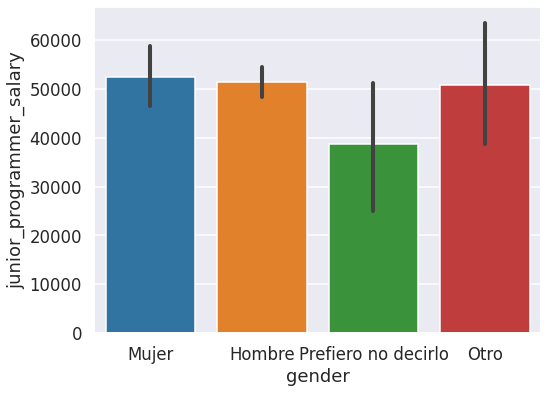

In [10]:
plt.figure(figsize=(8, 6))
seaborn.barplot(data=dataset, x='gender', y='junior_programmer_salary')
plt.show()

En este gráfico estamos usando la altura de las barras para representar el promedio de las estimaciones de salario para cada uno de los grupos. Sin embargo, esto no es evidente a primera vista. El usuario no tiene suficiente información para inferir el significado del eje vertical. Hay que tener en cuenta que muchas veces, **el nombre original de la columna no representa la información agregada**.

Por otra parte, ¿qué significan las líneas negras? Son los intervalos de confianza, que tienen un valor por default de 95. Indica que el verdadero valor poblacional del estadístico se encuentra en ese rango, con una confianza del 95%. Por eso vemos que (probablemente) para varones y mujeres, el rango es mucho más pequeño, ya que la muestra es mucho más grande. Para otros grupo minoritario, no tenemos certeza del valor real de la media poblacional porque la muestra es demasiado pequeña.

Este estadísico suele ser difícil de interpretar para quienes no son expertos en estadística, puede ser conveniente reemplazarlo por la desviación estándar de la muestra. Si bien estamos usando la misma codificación visual (las rayitas negras), los valores que representamos son completamente distintos. Si usamos un intervalo de confianza, estamos hablando de la distribución del estimador de la media poblacional, que es una variable aleatorio que toma valores en todas las muestras posibles. Por otro lado, si usamos la desviación estándar, estamos hablando del valor del estadístico en esta muestra.

Con esas observaciones, podemos construir un gráfico más representativo.

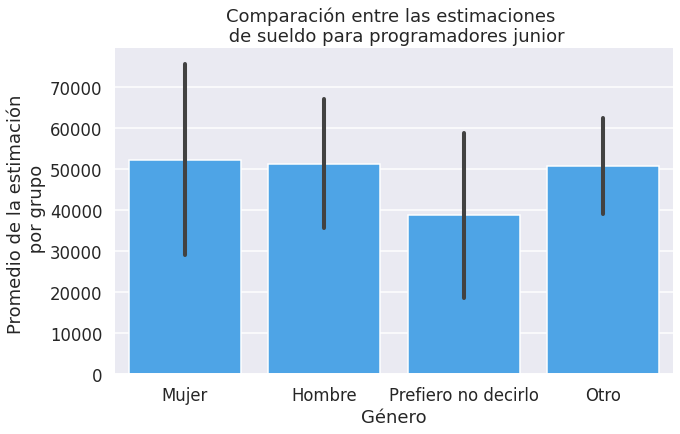

In [11]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='gender', y='junior_programmer_salary',
                color=BLUE, ci='sd')
plt.ylabel('Promedio de la estimación \n por grupo')
plt.xlabel('Género')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
seaborn.despine(left=True)

### 2.1 Agrupaciones

Es muy útil poder comparar también más de una variable categórica a la vez. Para ello, podemos usar el atributo `hue` de los gráficos de barra.

En general, conviene agrupar por la variable que tengan menos categorías. Entonces, si queremos comparar las estimaciones de sueldo con respecto la profesión y el género, conviene agrupar por género, que sólo puede tener 4 variables posbiles.

In [12]:
dataset

,timestamp,gender,age,zodiac_sign,profession,junior_programmer_salary,senior_programmer_salary
0,31/03/2020 17:10:01,Mujer,27,Tauro,Programadora,40000.0,80000.0
1,12/05/2020 15:19:14,Mujer,40,Acuario,Docente investigadora,50000.0,90000.0
2,13/05/2020 13:43:48,Hombre,22,Géminis,Estudiante de Astronomía,25000.0,60000.0
3,13/05/2020 18:12:04,Mujer,23,Cáncer,profesora,32000.0,50000.0
4,14/05/2020 16:30:09,Hombre,33,Capricornio,Docente investigador,60000.0,80000.0
...,...,...,...,...,...,...,...
156,27/05/2020 21:26:48,Hombre,21,Escorpio,sommelier,65000.0,75000.0
157,27/05/2020 21:27:26,Mujer,25,Libra,boxeadora profesional,45000.0,50000.0
158,27/05/2020 21:28:19,Mujer,29,Sagitario,paseadora de patos,125000.0,140000.0
159,27/05/2020 21:28:52,Mujer,26,Cáncer,Testeadora de toboganes,60000.0,80000.0


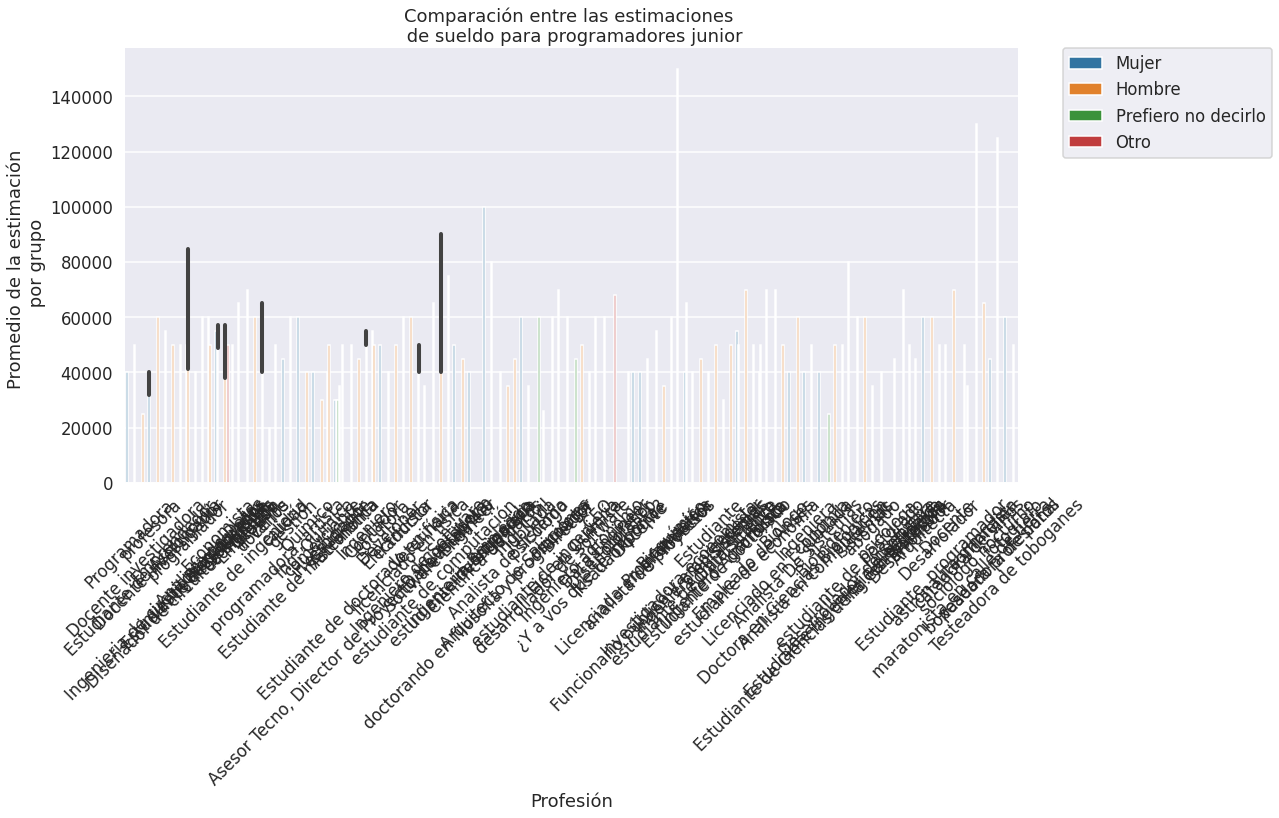

In [13]:
plt.figure(figsize=(16, 8))
seaborn.barplot(data=dataset, x='profession', y='junior_programmer_salary',
                hue='gender', ci='sd')
plt.ylabel('Promedio de la estimación \n por grupo')
plt.xlabel('Profesión')
plt.xticks(rotation=45)
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

¡El primer gráfico nos queda un desastre! Esto ocurre porque:
1. No podemos leer las etiquetas del eje x. Por suerte, esto es muy fácil de solucionar agregando `plt.xticks(rotation=90)`
1. La cantidad de valores para el campo profesión son demasiadas para un gráfico. Esto es solucionable: o bien manualmente agrupamos las categorías en valores estándar, o nos limitamos sólo a graficar las categorías con más datos.
1. No tenemos suficientes puntos para generar columnas para todas las combinaciones. Esta limitación es más difícil de solucionar, y puede indicarnos que este no es el método adecuado para representar esta información.
4. ¿Se les ocurren más?

Tratemos entonces con un gráfico que sí tenga sentido: dada la cantidad de respuestas, esperamos tener suficientes ejemplos para los dos géneros más populares y para casi todos los signos del zodiaco (a pesar de que no saquemos ninguna información útil de graficar esto).

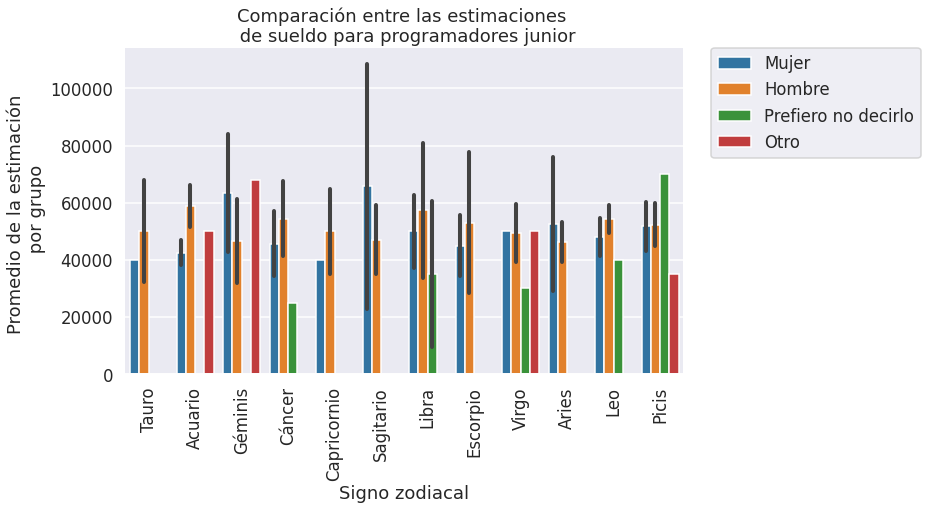

In [14]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='zodiac_sign', y='junior_programmer_salary',
                hue='gender', ci='sd')
plt.ylabel('Promedio de la estimación \n por grupo')
plt.xlabel('Signo zodiacal')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

### 2.2 Countplot

Otro gráfico de barra muy útil es el que en el eje vertical tiene el conteo de la cantidad de registros en una categoría. ¡Seaborn puede graficar esto muy fácilmente!

<AxesSubplot:xlabel='gender', ylabel='count'>

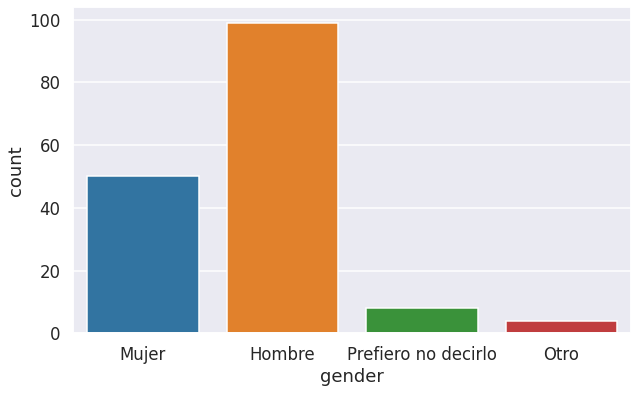

In [15]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=dataset, x='gender')

## 3. Histogramas

Muestra la distribución de una variable numérica, dividiendo las variables en segmentos (*bins*) o estimando una función de densidad. Ojo, ¡no es lo mismo que un gráfico de barras!

Por ejemplo, podemos graficar con más precisión la distribución de la variable *junior_programmer_salary*.

<AxesSubplot:title={'center':'Distribución de las estimaciones \n de sueldo para programadores junior'}, xlabel='junior_programmer_salary', ylabel='Count'>

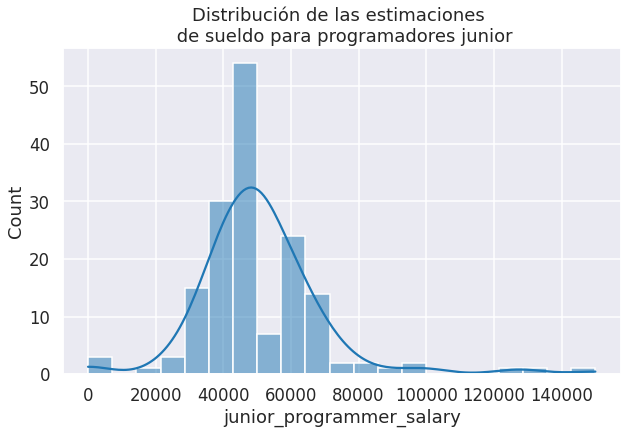

In [16]:
plt.figure(figsize=(10,6))
plt.title('Distribución de las estimaciones \n de sueldo para programadores junior')
seaborn.histplot(dataset.junior_programmer_salary.dropna(), kde=True)

### 3.1 Outliers

Es muy probable que encontremos outliers en nuestro dataset que complican la visualización. Vamos a ver cómo resolverlos en clase.

Una forma de calcular los outliers es con los percentiles o dejando sólo los que se encuentran en un rango de X desviaciones estándares de la media.

In [17]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_salarios_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_salarios_outlier]

data = clean_outliers(dataset, "junior_programmer_salary").junior_programmer_salary
print("Filas removidas", len(dataset) - len(data))
print("Salario máximo considerado", data.max())

Filas removidas 8
Salario máximo considerado 90000.0


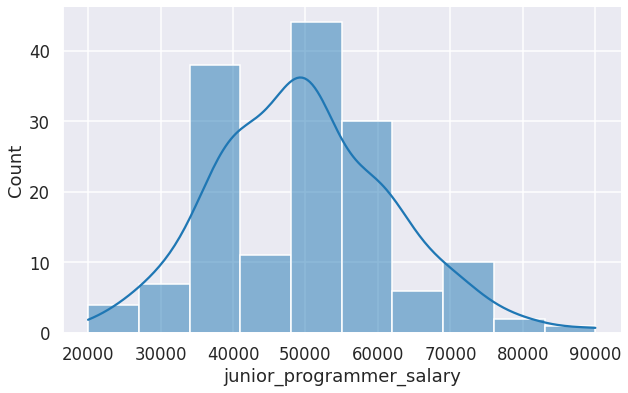

In [18]:
plt.figure(figsize=(10,6))
seaborn.histplot(data, bins=10, kde=True)
seaborn.despine()

### 3.2 Múltiples histogramas

¡Podemos finalmente comparar las distribuciones de los salarios para seniors y para juniors! Graficaremos dos histogramas, uno por encima del otro.

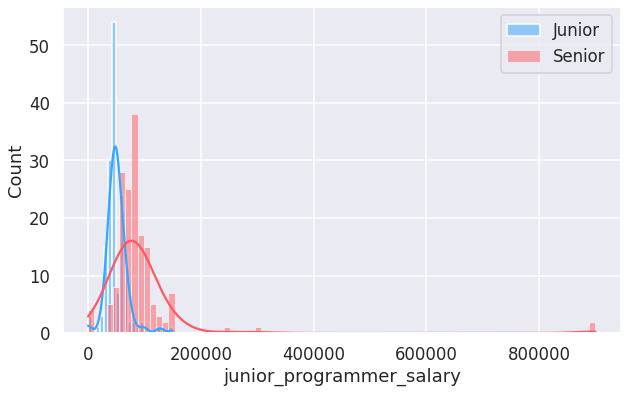

In [19]:
plt.figure(figsize=(10,6))
seaborn.histplot(
    dataset.junior_programmer_salary, label='Junior', kde=True, color=BLUE)
seaborn.histplot(
    dataset.senior_programmer_salary, label='Senior', kde=True, color=RED)
plt.legend()

## Ejercicio 1

* Limpiar el gráfico anterior para hacerlo más legible. Por ejemplo, agregar título y etiquetas, remover los outliers, agrandar el tamaño, cambiar el color. etc.
* Experimentar con distintos valores para el parámetro `bins`. ¿Cuál es el valor por defecto? ¿Qué sucede cuando es muy bajo? ¿Y cuando es muy alto?
* ¿A qué distribuciones de las vistas en clase se parece más cada histograma? ¿Son distintas? ¿Qué las diferencia?

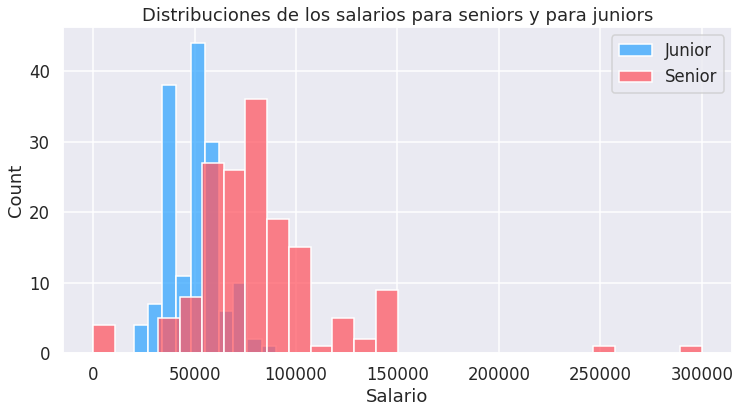

In [20]:
plt.figure(figsize=(12, 6))

data = clean_outliers(
    dataset, "junior_programmer_salary"
).junior_programmer_salary

seaborn.histplot(data, label='Junior', kde=False, color=BLUE)

data = clean_outliers(
    dataset, "senior_programmer_salary"
).senior_programmer_salary

seaborn.histplot(data, label='Senior', kde=False, color=RED)

plt.legend()
plt.title("Distribuciones de los salarios para seniors y para juniors")
plt.xlabel('Salario')
plt.show()

#### b)
`bin` argument for `matplotlib hist()`, or `None`, optional

Specification of hist bins. If unspecified, as reference rule is used that tries to find a useful default.

* Cuando es muy bajo la distribucion tiende a un solo punto, mientras que para un valor alto
  los valores tienden a estar mas esparcidos. 

* si se eliminan los outlayers tiende a una normal. 

## 4. Gráficos de línea

Es efectivo para comparar cantidades numéricas en una o varias categorías. Si lo comparamos con un gráfico de barras, tienen ventajas y desventajas. En primer lugar, sugiere una relación más fuerte entre los datos del eje horizontal, que deben ser secuenciales. Además de ello, pueden representar más valores ya que el peso visual de cada punto es mucho menor que una barra.

Por otra parte, un gráfico de líneas con pocos puntos puede ser indicativo de una tendencia que no existe (o que no tenemos suficientes datos como para mostrarla).

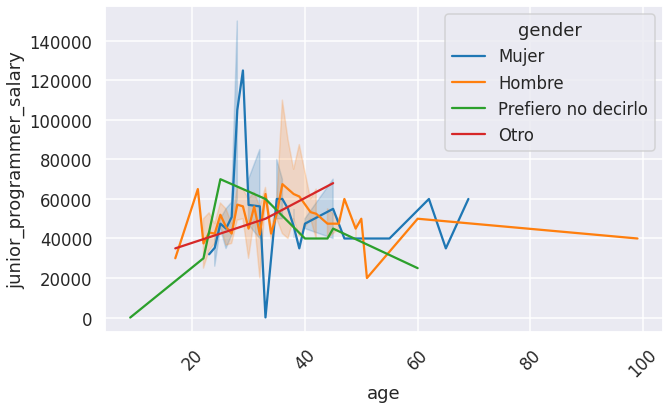

In [21]:
plt.figure(figsize=(10, 6))
seaborn.lineplot(data=dataset, x='age', y='junior_programmer_salary', hue='gender')
plt.xticks(rotation=45);

Claramente, hay muchas cosas para mejorar en este gráfico:

1. Agrupar los valores del eje x en intervalos para tener mayor densidad de puntos en cada grupo.
2. Sacar los outliers.
3. Utilizar la desviación estándar como intervalo de confianza, o removerlos completamente.


### 4.1 Binarizar variables numéricas

Solucionaremos la primera parte, y dejaremos como ejercicio las siguientes.

Podemos crear rangos etáreos de 5 años. También es conveniente poner un valor máximo y 
mínimo a partir del cual agrupar los valores ya que la distribución puede tener largas colas. 

En este caso, sólo sería necesario el valor superior, para agrupar personas, por ejemplo, 
mayores de 50 años. La función `pandas.cut` sirve para este tipo de situaciones.

In [22]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))

[(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 99)]


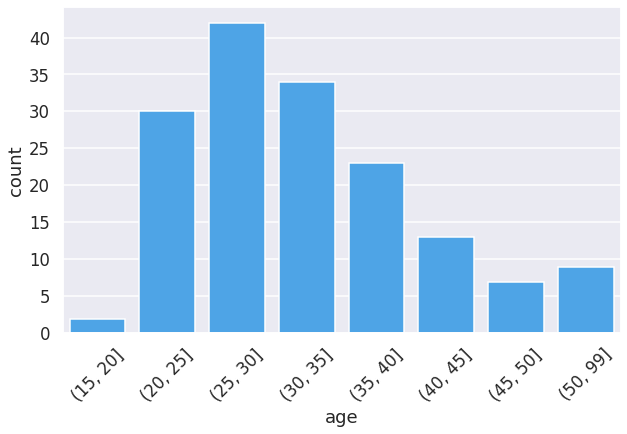

In [23]:
plt.figure(figsize=(10, 6))
seaborn.countplot(x=to_categorical(dataset.age.dropna()), color=BLUE)
plt.xticks(rotation=45)
plt.show()

[(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 99)]


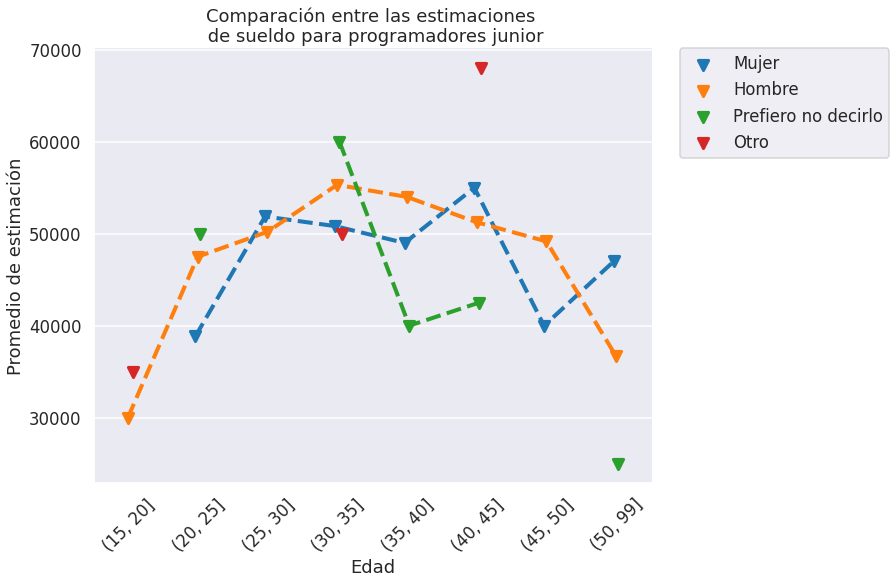

In [24]:
plt.figure(figsize=(10,8))
age_data = clean_outliers(dataset, "junior_programmer_salary")
age_data = age_data[~age_data.age.isnull()]
age_data['age_segment'] = to_categorical(age_data.age)
seaborn.pointplot(data=age_data,
                  x='age_segment', y='junior_programmer_salary',
                  hue='gender', dodge=True, ci=None,
                  markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.ylabel('Promedio de estimación')
plt.xlabel('Edad')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

## Ejercicio 2

Responder a las siguiente preguntas: 

1. ¿Qué información sacrificamos cuando removemos los estimadores de confianza de la visualización?
2. ¿Consideran que se pueden sacar conclusiones válidas a partir del gráfico? ¿Qué es lo que hay que tener en cuenta a la hora de analizar este tipo de resultados?
2. ¿Cuáles son las consecuencias de eliminar grupos con pocos elementos? ¿Eliminarían géneros minoritarios?

#### Respuestas
1. al sacarlos no cuenta con la informacion de la cantidad de los datos.
2. Existen datos faltantes para determinados generos como el Otro, entre
    (20, 30] y (30, 35].
3. Perderiamos datos que pueden aportar infomacion para otras carateristicas. 
    No eliminaria los datos, los juntaria para hacer un analisis en conjunto si clasificar 
    por genero.

## Gráficos de caja

Muestra la distribución de una variable numérica, de una forma más condensada que un histograma. Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

Por ejemplo, volvamos al ejemplo anterior para comparar la distribución de las estimaciones para el salario de un junior. Con un gráfico de caja, se vería de la siguiente manera:

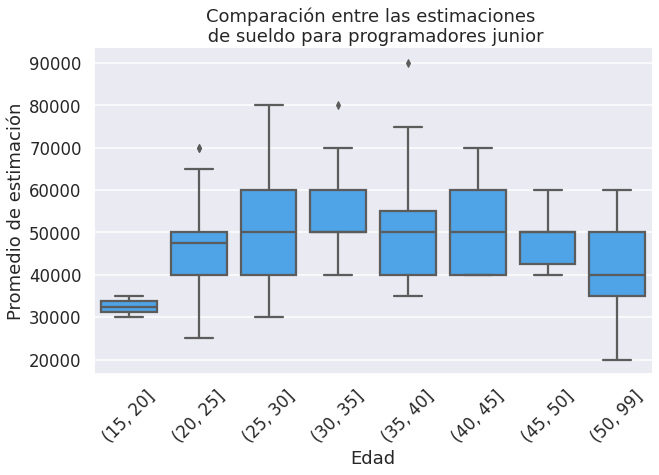

In [25]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=age_data,
                x='age_segment', y='junior_programmer_salary',
                color=BLUE)
plt.ylabel('Promedio de estimación')
plt.xlabel('Edad')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
plt.xticks(rotation=45)
seaborn.despine()

Con los boxplot también podemos comparar distribuciones por grupos. En este caso, si un grupo tiene una población muy reducida, su influencia visual es mucho menor ya que se traducen a cajas pequeñas o incluso sólo puntos.

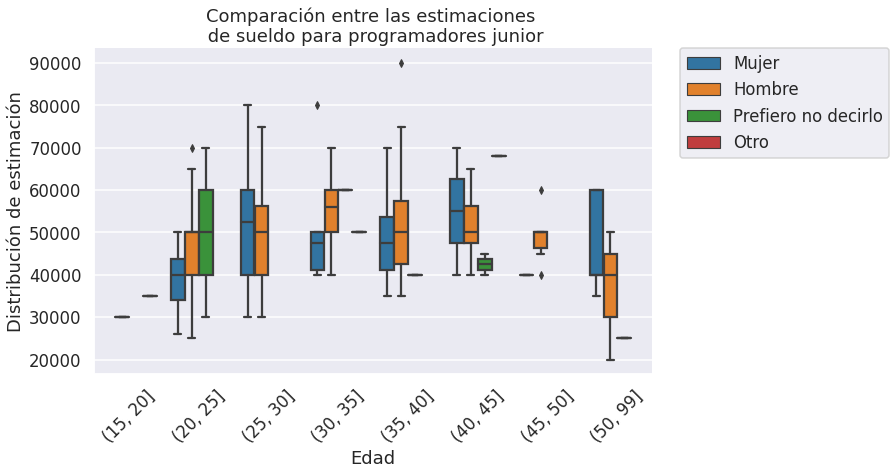

In [26]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=age_data,
                x='age_segment', y='junior_programmer_salary',
                hue='gender')
plt.ylabel('Distribución de estimación')
plt.xlabel('Edad')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

En este gráfico podemos ver, por ejemplo, todos los outliers con sueldos mayores a 100,000, que en el otro gráfico se agrupaban dentro de la barra de desviación estándar.

## Gráficos de puntos (scatterplot)

Muestra la relación entre 2 o 3 variables numéricas continuas. Adicionalmente, se puede usar el color y la forma de los puntos para variables categóricas, y el tamaño para una variable numérica extra.

Para poder ejemplificar el gráfico de puntos, debemos encontrar dos variables numéricas continuas. Tener en cuenta que por más que una variable sea discreta, al incluirla en un scatter plot la estamos tratando como una variable continua.

En nuestro ejemplo, podemos preguntarnos *¿Cómo varía la estimación de salarios con respecto a la edad de la persona?*

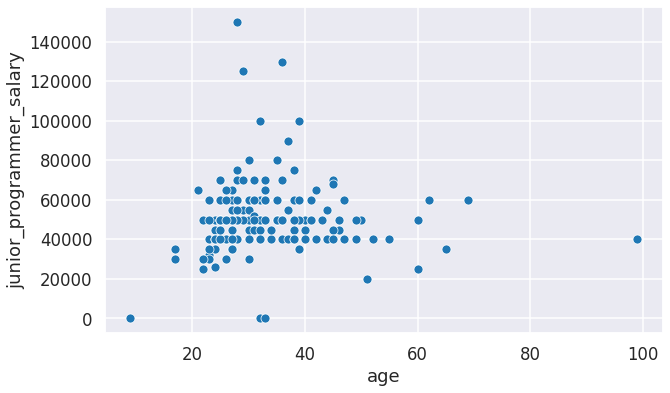

In [27]:
plt.figure(figsize=(10, 6))
seaborn.scatterplot(data=dataset, x='age', y='junior_programmer_salary')
plt.show()

Para hacer más evidente las tendencias que pueda tener el gráico, podemos utilizar seaborn para estimar una regresión lineal con los datos, utilizando el gráfico `seaborn.regplot`. Sin embargo, existen maneras más efectivas de medir correlación, gráficas y analíticas, que veremos más adelante.

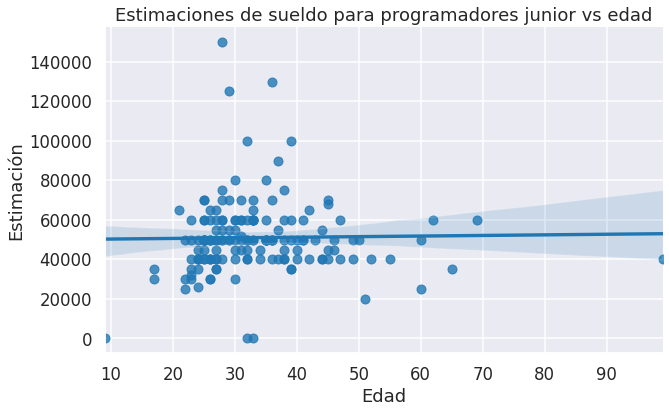

In [28]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset, x='age',
                y='junior_programmer_salary')
plt.ylabel('Estimación')
plt.xlabel('Edad')
plt.title('Estimaciones de sueldo para programadores junior vs edad')
seaborn.despine()